In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import xgboost as xgb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [2]:
cali = pd.read_csv('CALI.csv')

In [3]:
df_x = cali.iloc[:, 0:8]
df_y = cali.iloc[:, 8]

# Task1  Linear Regression Model

In [4]:
from statsmodels.api import OLS
model_LR = OLS(df_y, df_x).fit()
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          HOUSING PRICE   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        00:43:26   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.594      0.000       0.505       0.522
HouseAge       0.0157      0.000     33.727      0.000       0.015       0.017
AveRooms      -0.1825      0.006    -29.673      0.000      -0.195      -0.170
AveBedrms      0.8651      0.030     28.927      0.000       0.806       0.924
Population  7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
AveOccup      -0.0047      0.001     -8.987      0.000      -0.006      -0.004
Latitude      -0.0639      0.004    -17.826      0.000      -0.071      -0.057
Longitude     -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [6]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
results = model.predict(x_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)
print('R2 sq: ', model_score)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, results))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, results))

R2 sq:  0.6083953032289722
Mean squared error: 0.53
Test Variance score: 0.60


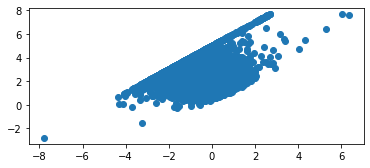

In [8]:
pred_val = model_LR.fittedvalues.copy()
residual = pred_val - df_y.values.flatten()

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val)

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


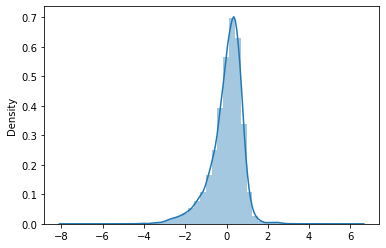

In [9]:
sns.distplot(residual);

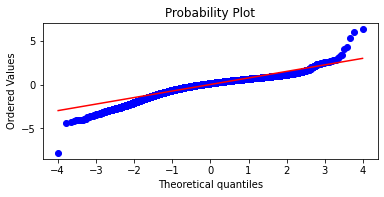

In [10]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

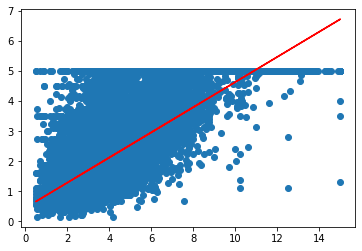

In [11]:
# Examining simple linear regression...

#X = df_x['CRIM'].values.reshape(-1, 1)
X = df_x.iloc[:,0].values.reshape(-1, 1)
#X = df_x['RM'].values.reshape(-1, 1)
#X = df_x.iloc[:,5].values.reshape(-1, 1)
Y = df_y.values.reshape(-1,1)

model3 = linear_model.LinearRegression()
model3.fit(X,Y)
Y_pred = model3.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

**Interpretation:**

From `OLS Regression Results` table, we can find that `R squared` for all the data is 0.892, which is close to 1. Therefore, we can use linear regression model to fit the data. Then we split the data into training set and test set. We use the training set to build the model and then use this model to predict. For building model part, we use training set and we get that `R squared` is 0.608. Although it is relatively lower, it is still larger than 0.5. Therefore, we may think the model is generally good. Then, we use the model to predict the test set, and get the `MSE` between predicted value and actual value is 0.53, which is low. And the `Test Variance score` is 0.60, which is 0.4 smaller than 1. Therefore, we may think that linear regression model is feasible for the data set. For the first graph, it shows scatter plot of residuals against the predicted values. For the second graph, it shows the distribution of residuals. For the third graph, most dots are on the line, and we may claim the residuals are close to normal distribution.

# Task2 GBM

In [12]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)
print('R2 sq: ',model_score)

y_predicted = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  0.804340562394092
Mean squared error: 0.28
Test Variance score: 0.78


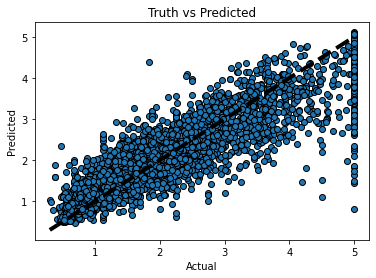

In [14]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Truth vs Predicted")
plt.show()

**Interpretation:**

We use the training set to build the model and find that `R squared` is 0.80, which is closer to 1 compared with the linear regression. Therefore, gradient boosting may perform better than linear regression. Then, we use test set to predict, and the `MSE` between predicted value and actual value is 0.28, which is lower than that of linear regression. And the `Test Variance socre` is 0.78, which is also closer to 1 compared with linear regression. And from the final graph, we can see that the actual values are centered around the prediced line. Therefore, we may claim that gradient boosting is generally doing better than linear regression for this data set.

# Task3 XGBoost

In [15]:
# XGBoost
params = {'n_estimators': 500, "objective":"reg:linear",'colsample_bytree': 0.5,
          'learning_rate': 0.01,'max_depth': 4, 'alpha': 1}
xg_reg = xgb.XGBRegressor(**params)

xg_reg.fit(x_train,y_train)
y_predicted = xg_reg.predict(x_test)

[00:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 0.29
Test Variance score: 0.77


In [17]:
# Gradient boosting
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_train, y_train)
y_predicted_2 = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted_2))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted_2))

Mean squared error: 0.28
Test Variance score: 0.78


[00:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


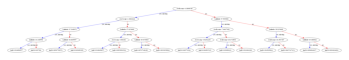

In [18]:
#XGBoost Visualizations
params = {"objective":"reg:linear",'colsample_bytree': 0.5,
          'learning_rate': 0.01, 'max_depth': 4, 'alpha': 1}
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = (40.0, 20.0)
plt.show()

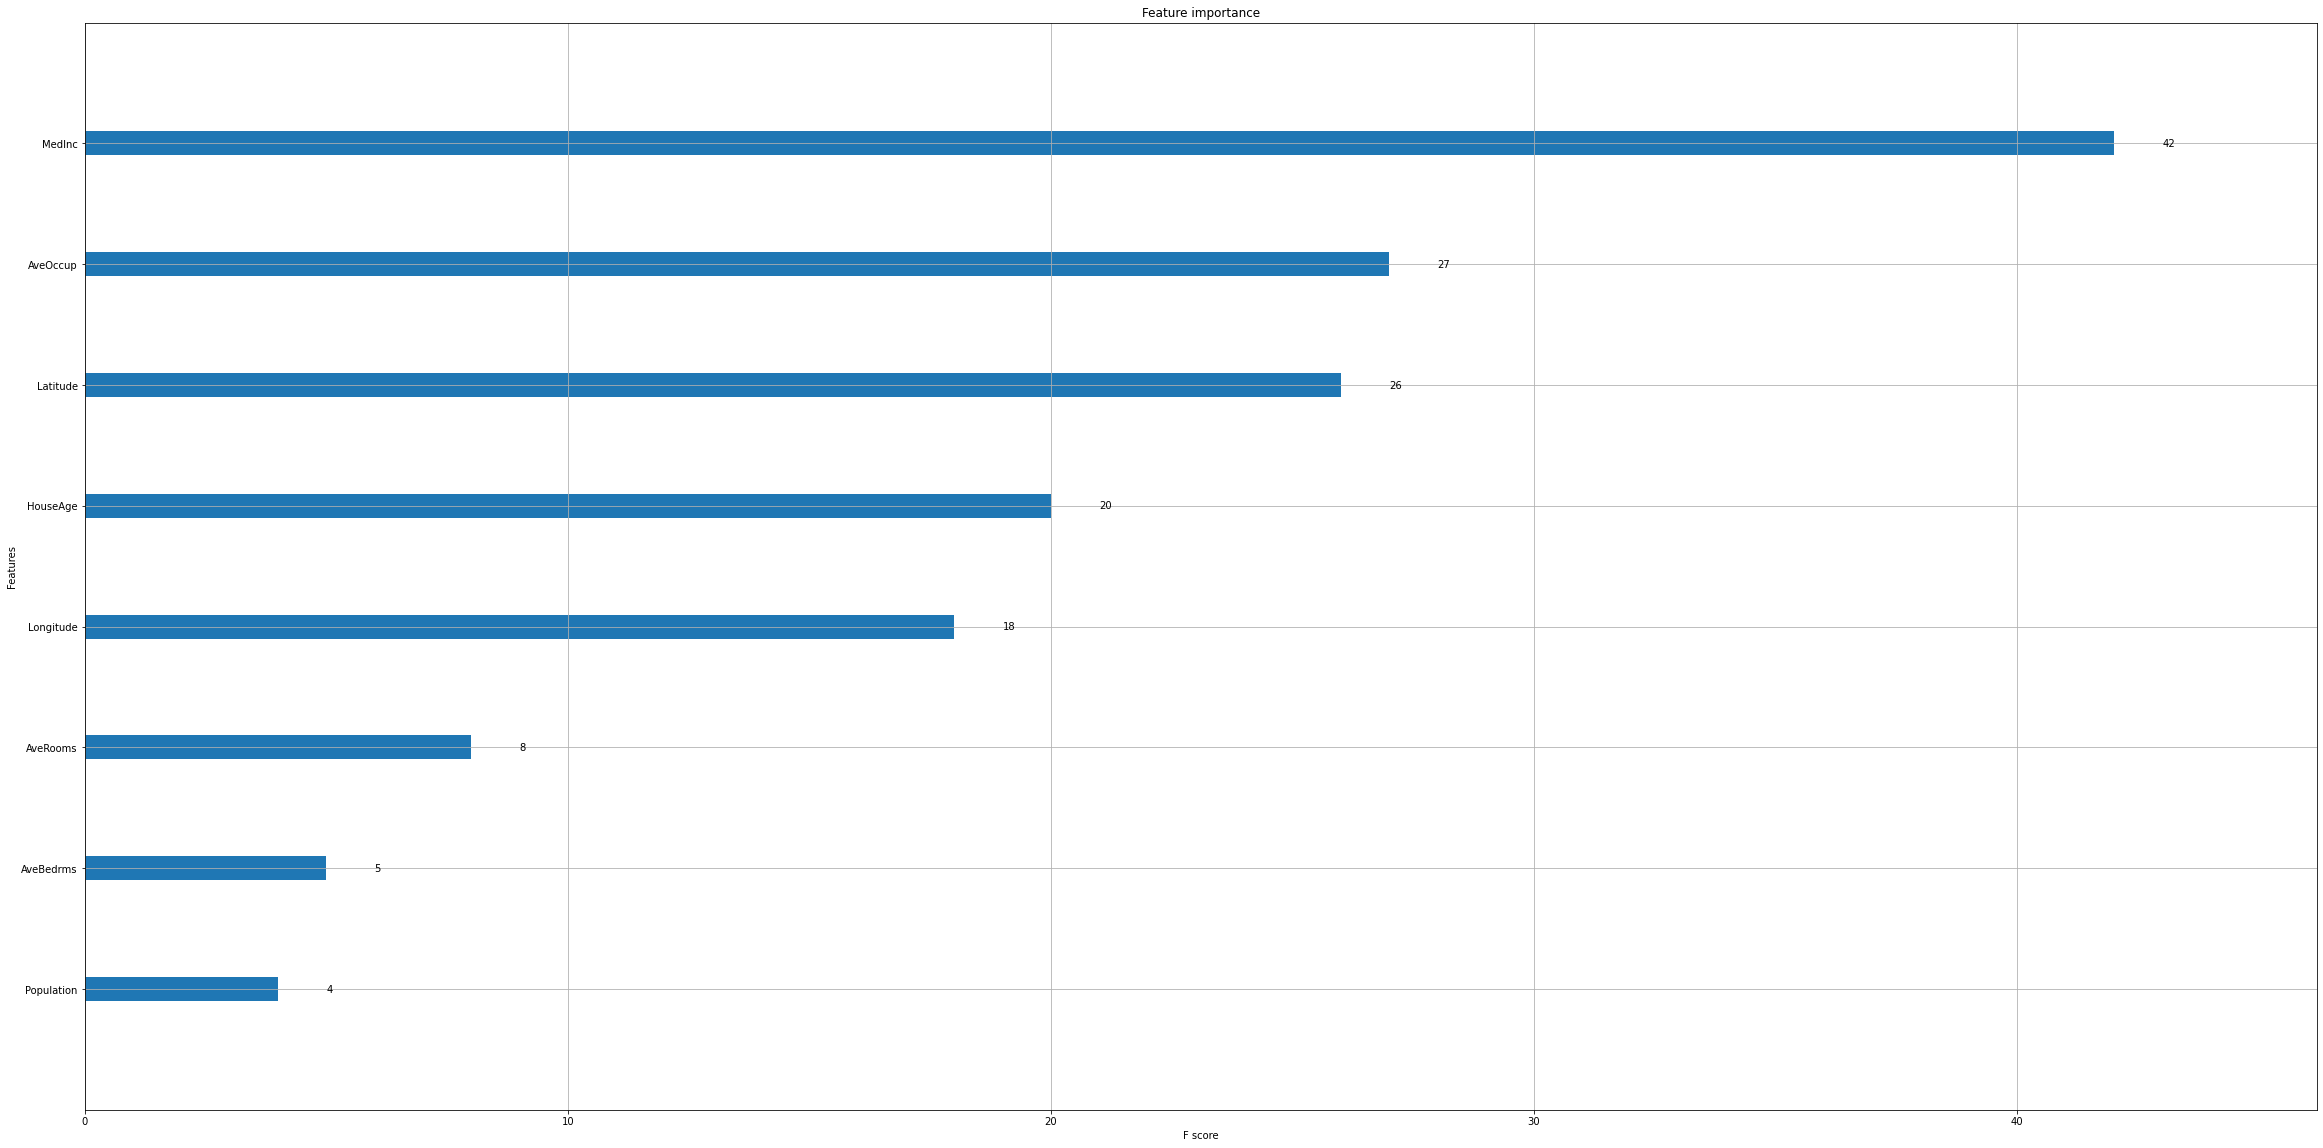

In [19]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

**Interpretation:**

We split the data into training set and test set. We use the training set to build XGBoost model and then use the test set to get predicted value. The `MSE` between predicted value and actual value is 0.29, which is low. And the `Test Variance socre` is 0.77, which is close to 1. We also run gradient boosting model and get `MSE` is 0.28, `Test Variance socre` is 0.78. We can see that XGBoost and GradBoost are very close. The last graph gives us the importance of each paramter, and the higher the score, the more the feature affects the house price.